# index--

# 1. Dropna values coloumns,rows, or specific
# 2. Handling missing values Numeric using mean
# 3. Handing missing values catagorical using mode
# 4. Handling missing values Numeric using interpolation
# 5. Preprocess catergorical before feeding to knn inputer
# 6/ knn imputaion for all columns
# 7. Min max preprocessing
# 8. remove outliers
 


In [11]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Read dataset

dfCity=pd.read_csv("datasets/innercity.csv")
df = pd.read_csv("datasets/hepatitis.csv")


In [13]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [24]:
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             0
malaise             0
anorexia            0
liver_big           0
liver_firm          1
spleen_palpable     1
spiders             1
ascites             1
varices             1
bilirubin           4
alk_phosphate      24
sgot                2
albumin            13
protime            59
histology           0
class               0
dtype: int64

In [25]:
#percentage of missing value

df.isna().sum()/len(df)*100

age                 0.000000
sex                 0.000000
steroid             0.689655
antivirals          0.000000
fatigue             0.000000
malaise             0.000000
anorexia            0.000000
liver_big           0.000000
liver_firm          0.689655
spleen_palpable     0.689655
spiders             0.689655
ascites             0.689655
varices             0.689655
bilirubin           2.758621
alk_phosphate      16.551724
sgot                1.379310
albumin             8.965517
protime            40.689655
histology           0.000000
class               0.000000
dtype: float64

In [26]:
#dropping na values
df.dropna(axis=1)

,age,sex,antivirals,fatigue,malaise,anorexia,liver_big,histology,class
0,30,male,False,False,False,False,False,False,live
1,50,female,False,True,False,False,False,False,live
2,78,female,False,True,False,False,True,False,live
3,31,female,True,False,False,False,True,False,live
4,34,female,False,False,False,False,True,False,live
...,...,...,...,...,...,...,...,...,...
150,46,female,False,True,True,True,True,True,die
151,44,female,False,True,False,False,True,True,live
152,61,female,False,True,True,False,False,True,live
153,53,male,False,True,False,False,True,True,live


In [27]:
#removing values row wise inplace (changes to be done within the dataset)
df.dropna(subset=['liver_big'],axis=0,inplace=True)

In [28]:
df.shape

(145, 20)

In [29]:

df.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [30]:
# MISSING VALUES FOR NUMERIC DATA
# fetch only int values 
import numpy as np
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [31]:
numeric_columns

Index(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], dtype='object')

In [32]:
numeric

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85.0,18.0,4.0,NaN
1,50,0.9,135.0,42.0,3.5,NaN
2,78,0.7,96.0,32.0,4.0,NaN
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,NaN,200.0,4.0,NaN
...,...,...,...,...,...,...
150,46,7.6,NaN,242.0,3.3,50.0
151,44,0.9,126.0,142.0,4.3,NaN
152,61,0.8,75.0,20.0,4.1,NaN
153,53,1.5,81.0,19.0,4.1,48.0


In [33]:
#-- Imputing missing value with mean of the coloumn
df[numeric_columns] = df[numeric_columns].fillna(df.mean())

In [34]:
df.isna().sum()

age                0
sex                0
steroid            1
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         1
spleen_palpable    1
spiders            1
ascites            1
varices            1
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [35]:
#HANDLING MISSING VALUE FOR CATEGORICAL DATA
boolean_columns = df.select_dtypes(include=np.object).columns.tolist()
boolean_columns.remove('class')
df[boolean_columns] = df[boolean_columns].astype('bool')

In [36]:
boolean_columns

['sex',
 'steroid',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices']

In [37]:
df[boolean_columns].fillna(df.mode())

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices
0,True,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False
2,True,True,True,False,False,True,False,False,False,False,False
3,True,True,False,False,False,True,False,False,False,False,False
4,True,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,True,True,True,True,False,False,True,True,True
151,True,True,True,False,False,True,True,False,False,False,False
152,True,False,True,True,False,False,True,False,True,False,False
153,True,False,True,False,False,True,False,True,True,False,True


In [38]:
df.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [60]:
#HANDLING MISSING VALUE USING INTERPOLATION
#Read dataset

dfCity=pd.read_csv("datasets/innercity.csv")
df = pd.read_csv("datasets/hepatitis.csv")

In [61]:

numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns
boolean_columns = df.select_dtypes(include=np.object).columns.tolist()
boolean_columns.remove('class')
df[boolean_columns] = df[boolean_columns].astype('bool')

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85.0,18.0,4.0,NaN
1,50,0.9,135.0,42.0,3.5,NaN
2,78,0.7,96.0,32.0,4.0,NaN
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,NaN,200.0,4.0,NaN
...,...,...,...,...,...,...
150,46,7.6,NaN,242.0,3.3,50.0
151,44,0.9,126.0,142.0,4.3,NaN
152,61,0.8,75.0,20.0,4.1,NaN
153,53,1.5,81.0,19.0,4.1,48.0


In [62]:
df[numeric_columns] = df[numeric_columns].interpolate(method ='linear', limit_direction ='backward')
df[boolean_columns].fillna(df.mode())

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices
0,True,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False
2,True,True,True,False,False,True,False,False,False,False,False
3,True,True,False,False,False,True,False,False,False,False,False
4,True,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,True,True,True,True,False,False,True,True,True
151,True,True,True,False,False,True,True,False,False,False,False
152,True,False,True,True,False,False,True,False,True,False,False
153,True,False,True,False,False,True,False,True,True,False,True


In [63]:
df.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [22]:
df.iloc[2,1]

0.0

In [1]:
#Handling missing values using scikit and k nearest neigghbour

import numpy as np
import pandas as pd
df = pd.read_csv("datasets/hepatitis.csv")

In [2]:
df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [4]:
#LABEL encoding
#-- converting categorical to labels or numerical

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df["class"])
df["class"] = le.transform(df["class"])

le.fit(df["sex"])
df["sex"] = le.transform(df["sex"])

In [5]:
#-- knn imputer for all numeric and categorical
from sklearn.impute import KNNImputer


columns = df.columns
for i in columns:
    X1 = np.array(df[i]).reshape(-1,1)
    X2 = np.array(df.index).reshape(-1,1)
    X = np.hstack((X1,X2))


    preprocessor = KNNImputer(n_neighbors=5, weights="distance")
    preprocessor.fit(X)
    X_prep = preprocessor.transform(X)
    df[i] = np.hsplit(X_prep, 2)[0].reshape(1,-1)[0]

In [6]:
df.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [49]:
# Min max scaling
#Read dataset

dfCity=pd.read_csv("datasets/innercity.csv")
dfCity

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5137800030,20140701T000000,300000,4,2.50,2303,3826,2.0,0,0,...,0,2006,0,98092,47.3258,-122.165,2516,4500,0,6129
21609,8562890910,20140619T000000,320000,4,2.50,3490,5000,2.0,0,0,...,0,2003,0,98042,47.3772,-122.127,2910,5025,0,8490
21610,1442880160,20140627T000000,483453,4,2.75,2790,5527,2.0,0,0,...,0,2014,0,98045,47.4827,-121.773,2620,5509,0,8317
21611,622100130,20140917T000000,365000,2,2.00,1440,15000,1.0,0,0,...,0,1985,0,98072,47.7648,-122.159,1780,15000,0,16440


In [50]:
print('Bed Rooms')
print(sorted(list(dfCity.room_bed.unique())))
print('Bath Rooms')
print(sorted(list(dfCity.room_bath.unique())))
print('Coast')
print(sorted(list(dfCity.coast.unique())))
print('sight')
print(sorted(list(dfCity.sight.unique())))
print('condition')
print(sorted(list(dfCity.condition.unique())))
print('quality')
print(sorted(list(dfCity.quality.unique())))
print('basemnet')
print(sorted(list(dfCity.basement.unique())))
print('furnished')
print(sorted(list(dfCity.furnished.unique())))


Bed Rooms
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
Bath Rooms
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]
Coast
[0, 1]
sight
[0, 1, 2, 3, 4]
condition
[1, 2, 3, 4, 5]
quality
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
basemnet
[0, 10, 20, 40, 50, 60, 65, 70, 80, 90, 100, 110, 120, 130, 140, 143, 145, 150, 160, 170, 172, 176, 180, 190, 200, 207, 210, 220, 225, 230, 235, 240, 243, 248, 250, 260, 265, 266, 270, 274, 276, 280, 283, 290, 295, 300, 310, 320, 330, 340, 350, 360, 370, 374, 380, 390, 400, 410, 414, 415, 417, 420, 430, 435, 440, 450, 460, 470, 475, 480, 490, 500, 506, 508, 510, 515, 516, 518, 520, 530, 540, 550, 556, 560, 570, 580, 588, 590, 600, 602, 610, 620, 630, 640, 650, 652, 660, 666, 670, 680, 690, 700, 704, 710, 720, 730, 740, 750, 760, 768, 770, 780, 784, 790, 792, 800, 810, 820, 830, 840, 850, 860, 861, 862, 870, 875, 880, 890, 894, 900, 906, 910, 91

In [51]:
#columns = columns.delete([0,1])

In [52]:

#-- Need to label encode string data for min max scaler
#. all coloumns are minmax now


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dfCity["dayhours"])
dfCity["dayhours"] = le.transform(dfCity["dayhours"])

from sklearn.preprocessing import MinMaxScaler
for i in dfCity:
    scaler = MinMaxScaler()
    dfCity[[i]] = scaler.fit_transform(dfCity[[i]])

In [53]:
dfCity #--after scalling 

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,0.306415,0.509434,0.096144,0.121212,0.40625,0.206038,0.007837,0.0,0.0,0.0,...,0.000000,0.486957,0.0,0.666667,0.903169,0.151993,0.296162,0.007928,1.0,0.009117
1,0.882006,0.579515,0.026557,0.121212,0.31250,0.170566,0.004228,0.0,0.0,0.0,...,0.165975,0.660870,0.0,0.111111,0.258324,0.110465,0.320255,0.009361,0.0,0.005225
2,0.515560,0.927224,0.043148,0.090909,0.31250,0.156981,0.002304,0.4,0.0,0.0,...,0.000000,0.921739,0.0,0.186869,0.314621,0.431894,0.339184,0.004247,0.0,0.003192
3,0.620729,0.072776,0.029508,0.060606,0.12500,0.040000,0.002014,0.0,0.0,0.0,...,0.000000,0.139130,0.0,0.666667,0.883063,0.141196,0.192910,0.003668,0.0,0.001963
4,0.901414,0.938005,0.081836,0.060606,0.18750,0.083774,0.002138,0.0,0.0,0.0,...,0.000000,0.469565,0.0,0.575758,0.837864,0.207641,0.258303,0.006075,0.0,0.002439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.518921,0.161725,0.029508,0.121212,0.31250,0.151925,0.002003,0.4,0.0,0.0,...,0.000000,0.921739,0.0,0.459596,0.273283,0.294020,0.364309,0.004421,0.0,0.002850
21609,0.864925,0.129380,0.032131,0.121212,0.31250,0.241509,0.002714,0.4,0.0,0.0,...,0.000000,0.895652,0.0,0.207071,0.355959,0.325581,0.432112,0.005024,0.0,0.004280
21610,0.145659,0.150943,0.053568,0.121212,0.34375,0.188679,0.003033,0.4,0.0,0.0,...,0.000000,0.991304,0.0,0.222222,0.525655,0.619601,0.382206,0.005580,0.0,0.004175
21611,0.062744,0.371968,0.038033,0.060606,0.25000,0.086792,0.008771,0.0,0.0,0.0,...,0.000000,0.739130,0.0,0.358586,0.979411,0.299003,0.237653,0.016483,0.0,0.009094


<AxesSubplot:>

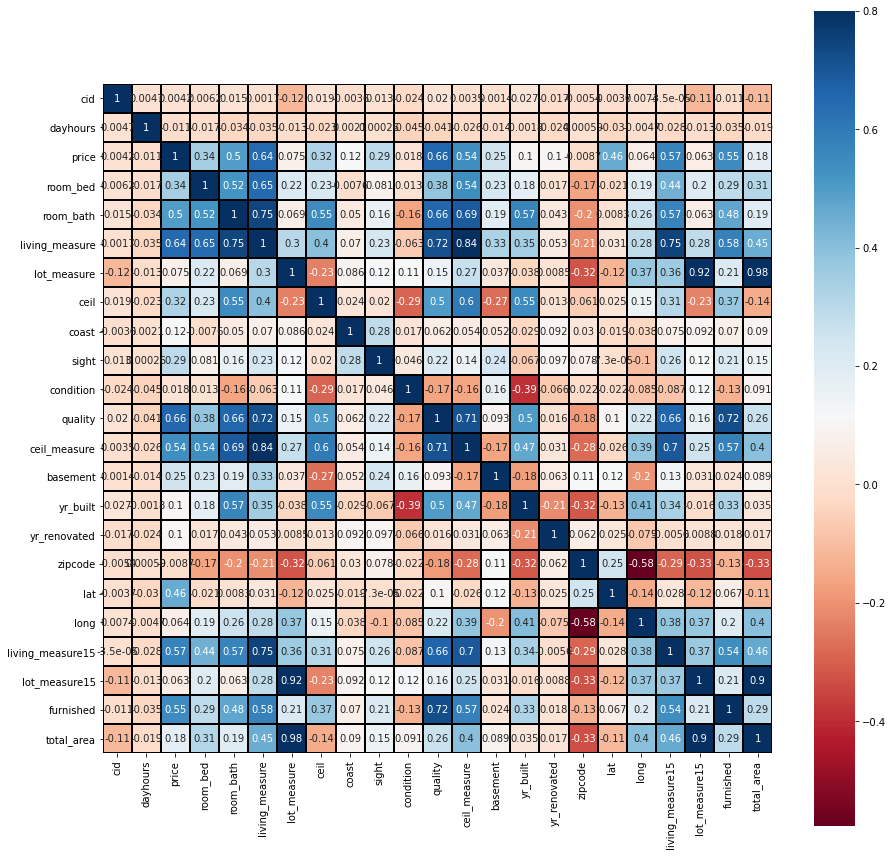

In [55]:
# prestep to similar features and unneccasry to classificaiton
corr=dfCity.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')

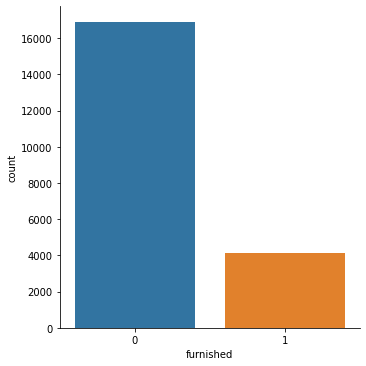

In [135]:
#-- feature selection
#-- looking for class imbalance
sn.factorplot('furnished',data=dfCity,kind='count')

<AxesSubplot:xlabel='furnished'>

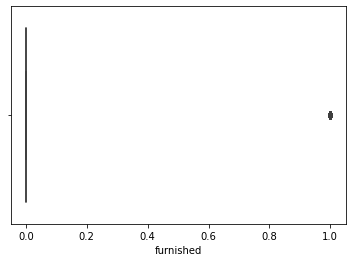

In [178]:
#---outlier detection and removal techniques:

dfCity=pd.read_csv("datasets/innercity.csv")
dfCity

import seaborn as sns
sns.boxplot(data=dfCity,x=dfCity["furnished"])


In [179]:
from scipy import stats
z=np.abs(stats.zscore(dfCity.basement))
print(z.shape)

(21613,)


In [180]:
import itertools
threshold=3

b = list(np.where(z>3))

merged = list(itertools.chain.from_iterable(b)) #--flat the array or list of list
print(len(merged))

247


In [181]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return lower_limit, upper_limit,np.array(outliers)

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(16,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values:',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

In [182]:
#---use for single feature
#-- outlier detectionn and removal

outliers = list(findoutliers(dfCity["room_bed"]))
number_Of_Outliers = len(outliers[2])
unique_values_outliers  = list(set(outliers[2]))
Lower_bound = outliers[0]
upper_bound = outliers[1]
print("Lower_bound", outliers[0])
print("Upper_bound", outliers[1])

print("total outliers:", number_Of_Outliers)
print("Unique outliers", unique_values_outliers)



print("before",dfCity.shape)
dfCity["room_bed"] 
dfCity = dfCity[dfCity["room_bed"] > Lower_bound]
dfCity = dfCity[dfCity["room_bed"] < upper_bound]
print("after", dfCity.shape)

Lower_bound 1.5
Upper_bound 5.5
total outliers: 546
Unique outliers [0, 1, 33, 6, 7, 8, 9, 10, 11]
before (21613, 23)
after (21067, 23)


(0, 23)
